In [1]:
#meta 5/14/2019 How to call R from Python

# 5/14/2019 SETUP
#      enbable basic R in Python
#      graphics with ggplot

# Calling R from Python

based on https://sites.google.com/site/aslugsguidetopython/data-analysis/pandas/calling-r-from-python
- First of all you have to have both R and python installed. You then need to install rpy2.
- pip install rpy2

Stuck at import pandas.rpy.common as com - no more pandas.rpy  
Refer to https://pandas.pydata.org/pandas-docs/version/0.19/r_interface.html  
Similar functionality can be accessed through the rpy2 project.
https://rpy2.readthedocs.io/

Good sources:  
https://rpy2.readthedocs.io/en/version_2.8.x/overview.html  
https://rpy2.readthedocs.io/en/version_2.8.x/

In [2]:
from numpy import *
import scipy as sp
import matplotlib
#import matplotlib.pyplot as plot
%matplotlib inline
from pandas import *
from rpy2.robjects.packages import importr
import rpy2.robjects as ro

#no more pandas.rpy
#refer https://stackoverflow.com/questions/45221609/modulenotfounderror-no-module-named-pandas-rpy
#import pandas.rpy.common as com

In [3]:
ro.r('x=c()')
ro.r('x[1]=22')
ro.r('x[2]=44')
print(ro.r('x'))
type(ro.r('x'))

[1] 22 44



rpy2.robjects.vectors.FloatVector

## Introduction to rpy2
https://rpy2.readthedocs.io/en/version_2.8.x/introduction.html

https://rpy2.readthedocs.io/en/version_2.8.x/overview.html

rpy2 is like any other python package binding to a C library. Its top level can be imported, and the version obtained.

In [4]:
import rpy2
print(rpy2.__version__)

3.0.4


rpy2 is providing 2 levels of interface with R: - low-level (rpy2.rinterface) - high-level (rpy2.robjects).

The high-level interface is trying to make the use of R as natural as possible for a Python user (something sometimes referred to as “pythonic”), and this introduction is only coverage that interface.

Importing the top-level sub-package is also initializing and starting R embedded in the current Python process:

## Graphics and Plots - With ggplot2

ggplot is a plotting system for Python based on R's ggplot2 and the Grammar of Graphics. It is built for making profressional looking, plots quickly with minimal code. (refer to http://ggplot.yhathq.com)

In [5]:
#importing data
datasets = importr('datasets')
from rpy2.robjects.packages import data
mtcars = data(datasets).fetch('mtcars')['mtcars']

### Option 1 - with R cells

In [6]:
# load the needed extension for the %%R cell magic
%load_ext rpy2.ipython

In [7]:
%%R
# load the ggplot2 library
library(ggplot2)

R[write to console]: Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang



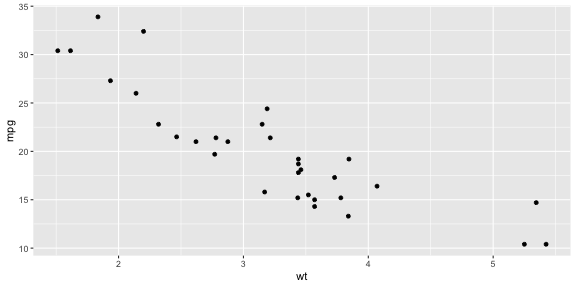

In [8]:
%%R -i mtcars -w 8 -h 4 -u in

ggplot(mtcars, aes(x=wt, y=mpg)) + geom_point()

### Option 2 - with rpy2 ggplot2
Refer https://rpy2.readthedocs.io/en/version_2.8.x/graphics.html#package-ggplot2
Seems to work but doesn't print (could be a simple setting like show, similar in Pycharm?).

In [9]:
import rpy2.robjects.lib.ggplot2 as ggplot2

/Users/Amigo/anaconda3/lib/python3.6/site-packages/rpy2/robjects/lib/ggplot2.py:69: UserWarning: This was designed againt ggplot2 version 3.1.0 but you have 3.1.1
  'have %s' % (TARGET_VERSION, ggplot2.__version__))


In [10]:
gp = ggplot2.ggplot(mtcars)

pp = gp + \
     ggplot2.aes_string(x='wt', y='mpg', col='factor(cyl)') + \
     ggplot2.geom_point()

pp.plot()

### Option 3 (Simplest) - with ggplot from yhat
http://ggplot.yhathq.com

/Users/Amigo/anaconda3/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/Users/Amigo/anaconda3/lib/python3.6/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp


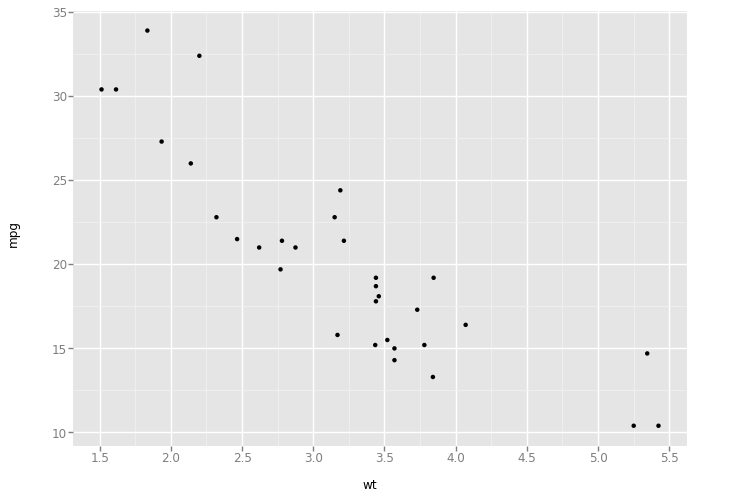

<ggplot: (293789055)>

In [11]:
from ggplot import *

p = ggplot(mtcars, aes('wt','mpg')) + \
    geom_point(color='black') 
p

## Porting code to rpy2
https://rpy2.readthedocs.io/en/version_2.8.x/porting-to-rpy2.html#from-rpy

#### Setting up
rpy2 can hide more of the R layer, providing an interface that only requires Python knowledge.

In [12]:
from rpy2.robjects.vectors import DataFrame
from rpy2.robjects.packages import importr, data

r_base = importr('base')
print(r_base._libPaths())
print(r_base.R_home())

[1] "/Library/Frameworks/R.framework/Versions/3.6/Resources/library"

[1] "/Library/Frameworks/R.framework/Resources"



#### Importing the data
If you do not have the data file nearby, this dataset can be loaded from R’s own collection of datasets:

In [13]:
#importing data
datasets = importr('datasets')
faithful_data = data(datasets).fetch('faithful')['faithful']

Summary

In [14]:
#help with data
#?faithful_data
faithful_data.rx2("eruptions")

3.600000,1.800000,3.333000,...,4.417000,1.817000,4.467000


In [15]:
edsummary = r_base.summary(faithful_data.rx2("eruptions"))
#?edsummary

print (str(edsummary))

#for k, v in edsummary.items():
#   print("%s: %.3f\n" %(k, v))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.600   2.163   4.000   3.488   4.454   5.100 



In [16]:
edsummary = r_base.summary(faithful_data)
#?edsummary

print (str(edsummary))

   eruptions        waiting    
 Min.   :1.600   Min.   :43.0  
 1st Qu.:2.163   1st Qu.:58.0  
 Median :4.000   Median :76.0  
 Mean   :3.488   Mean   :70.9  
 3rd Qu.:4.454   3rd Qu.:82.0  
 Max.   :5.100   Max.   :96.0  



Stem-and-leaf plot

In [17]:
graphics = importr('graphics')

print("Stem-and-leaf plot of Old Faithful eruption duration data")
graphics.stem(faithful_data.rx2("eruptions"))

Stem-and-leaf plot of Old Faithful eruption duration data

  The decimal point is 1 digit(s) to the left of the |

  16 | 070355555588
  18 | 000022233333335577777777888822335777888
  20 | 00002223378800035778
  22 | 0002335578023578
  24 | 00228
  26 | 23
  28 | 080
  30 | 7
  32 | 2337
  34 | 250077
  36 | 0000823577
  38 | 2333335582225577
  40 | 0000003357788888002233555577778
  42 | 03335555778800233333555577778
  44 | 02222335557780000000023333357778888
  46 | 0000233357700000023578
  48 | 00000022335800333
  50 | 0370



<rpy2.rinterface.NULLType object at 0x1158266c8> [RTYPES.NILSXP]

Histogram

In [18]:
grdevices = importr('grDevices')
stats = importr('stats')
grdevices.png('img/faithful_histogram.png', width = 733, height = 550)
ed = faithful_data.rx2("eruptions")
graphics.hist(ed, r_base.seq(1.6, 5.2, 0.2),
              prob = True, col = "lightblue",
              main = "Old Faithful eruptions", xlab = "Eruption duration (seconds)")
graphics.lines(stats.density(ed,bw=0.1), col = "orange")
graphics.rug(ed)
grdevices.dev_off()

2


![Histogram](img/faithful_histogram.png)

Note: ensure ggplot2 package is installed in R
> install.packages('ggplot2')

Again, it seems to work but doesn't display.

In [19]:
#from rpy2.robjects.lib import ggplot2

#warning: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`. 
#refer https://www.inertia7.com/projects/6

p = ggplot2.ggplot(faithful_data) + \
    ggplot2.aes_string(x = "eruptions") + \
    ggplot2.geom_histogram(binwidth=10, fill = "lightblue") + \
    ggplot2.geom_density(ggplot2.aes_string(y = '..count..'), colour = "orange") + \
    ggplot2.geom_rug() + \
    ggplot2.scale_x_continuous("Eruption duration (seconds)") 

p.plot()

### Xtra

Use pandas2ri - error

In [20]:
#refer https://stackoverflow.com/questions/54676900/i-want-to-use-pandas2ri-in-jupyter-but-tzlocal-issue
#run pip install tzlocal first
from rpy2.robjects import pandas2ri
pandas2ri.activate()

In [22]:
from rpy2.robjects import r
r.data('iris')
df_iris = pandas2ri.ri2py(r[name])

AttributeError: module 'rpy2.robjects.pandas2ri' has no attribute 'ri2py'